In [83]:
import urllib.request
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup as bs
import ipywidgets as widgets
import requests


In [85]:
search = widgets.Text(
    value='Watch',
    placeholder='Type something',
    description='Search Text:',
    disabled=False
)
display(search)

Text(value='Watch', description='Search Text:', placeholder='Type something')

In [86]:
amazon = 'https://www.amazon.ca/'
if len(search.value):
    base_url = amazon+'s?k='+search.value+'&ref=nb_sb_noss'
else:
    print('Please search for an item')

# Add 1 because Python range.
url_list = ["{}{}".format(base_url, str(page)) for page in range(1, 100)]
links=[]
for url in url_list:
    #print (url)
    links.append(url)
    
select_page = widgets.Dropdown(
    options=links,
    value=links[1],
    description='Select a Page:',
    disabled=False
)
display(select_page)
length =len(links)
print(length)

Dropdown(description='Select a Page:', index=1, options=('https://www.amazon.ca/s?k=Watch&ref=nb_sb_noss1', 'h…

99


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

In [136]:
#no_pages = 2

def get_data(pageNo):  
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    r = requests.get('https://www.amazon.ca/Best-Sellers-Electronics/zgbs/electronics/ref=zg_bs_pg_'+str(pageNo)+'?_encoding=UTF8&pg='+str(pageNo), headers=headers)#, proxies=proxies)
    content = r.content
    soup = BeautifulSoup(content)
    #print(soup)

    alls = []
    for d in soup.findAll('div', attrs={'class':'a-section a-spacing-none aok-relative'}):
        #print(d)
        name = d.find('span', attrs={'class':'zg-text-center-align'})
        n = name.find_all('img', alt=True)
        #print(n[0]['alt'])
#         author = d.find('a', attrs={'class':'a-size-small a-link-child'})
        rating = d.find('span', attrs={'class':'a-icon-alt'})
        users_rated = d.find('a', attrs={'class':'a-size-small a-link-normal'})
        price = d.find('span', attrs={'class':'p13n-sc-price'})        

        all1=[]

        if name is not None:
            #print(n[0]['alt'])
            all1.append(n[0]['alt'])
        else:
            all1.append("unknown-product")

#         if author is not None:
#             #print(author.text)
#             all1.append(author.text)
#         elif author is None:
#             author = d.find('span', attrs={'class':'a-size-small a-color-base'})
#             if author is not None:
#                 all1.append(author.text)
#             else:    
#                 all1.append('0')

        if rating is not None:
            #print(rating.text)
            all1.append(rating.text)
        else:
            all1.append('-1')

        if users_rated is not None:
            #print(price.text)
            all1.append(users_rated.text)
        else:
            all1.append('0')     

        if price is not None:
            #print(price.text)
            all1.append(price.text)
        else:
            all1.append('0')
        alls.append(all1)        
    return alls

results = []
for i in range(1, no_pages+1):
    results.append(get_data(i))
flatten = lambda l: [item for sublist in l for item in sublist]
df = pd.DataFrame(flatten(results),columns=['Name','Rating','Customers_Rated', 'Price'])
df.head()
# len(df)
# df.to_csv('amazon_products.csv', index=False, encoding='utf-8')

select_tech1 = widgets.Dropdown(
    options=df['Rating'].unique(),
    description='Select a Page:',
    disabled=False
)
# select_tech2 = widgets.Dropdown(
#     options=df['Name'],
#     description='Select a Page:',
#     disabled=False
# )
output=widgets.Output()
display(select_tech1, output)
def on_value_change(change):
    with output:
        output.clear_output()
        df1 = df[df['Rating']==select_tech1.value]
        #select_tech2.options=df1['Name']
        print('You have ' + str(len(df1)) + ' products with that rating')
        print(df1.head())

select_tech1.observe(on_value_change, names= 'value')
#df.head()

Dropdown(description='Select a Page:', options=('4.7 out of 5 stars', '4.6 out of 5 stars', '4.0 out of 5 star…

Output()

In [100]:
df.head()

,Book Name,Author,Rating,Customers_Rated,Price
0,Fire TV Stick 4K streaming device with Alexa b...,0,4.7 out of 5 stars,"30,687",$69.99
1,Fire TV Stick (3rd Gen) with Alexa Voice Remot...,0,4.6 out of 5 stars,683,$59.99
2,Fire TV Stick Lite with Alexa Voice Remote Lit...,0,4.7 out of 5 stars,"9,017",$49.99
3,TP-Link AC750 WiFi Range Extender RE200 - Cove...,0,4.0 out of 5 stars,"16,201",$29.99
4,Seagate Portable 2TB External Hard Drive Porta...,0,4.7 out of 5 stars,"114,196",$79.99


In [198]:
import csv
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

def extract(item):
    atag = item.h2.a
    description = atag.text.strip()
    
    url = 'https://www.amazon.com' + atag.get('href')
    try:
        price_parent = item.find('span','a-price')
        price = price_parent.find('span','a-offscreen').text
    except AttributeError:
        return
    
    try:
        rating = item.find('span',{'class': 'a-icon-alt'}).text
        num_review = item.find('span',{'class': 'a-size-base'}).text
    except:
        rating = ''
        num_review = 0
    result = (description,price,rating,num_review,url)
    
    return result  

search = widgets.Text(
    value='Watch',
    placeholder='Type something',
    description='Search Text:',
    disabled=False
)
display(search)

Text(value='Watch', description='Search Text:', placeholder='Type something')

Button(description='Click Me!', style=ButtonStyle())

In [223]:
import csv
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

#Create an extraction model that will retrieve the desired product information 


#Main program function where the the search and extract functions are used to apply the extraction model to the first 6 pages of amazon.
#The data extracted is formatted and added to a csv file named after the desired product. 
#search_term = input('What would you like to search Amazon for? ')
driver = webdriver.Chrome(ChromeDriverManager().install())
    
records = []
general = 'https://www.amazon.com/s?k={}&ref=nb_sb_noss_2'
new_search = (search.value).replace(' ', '+')
new = general.format(new_search)
new += '&page={}'
#print('number of pages' + str(len(new)))
for page in range(1,len(new)):
#for page in range(1,10):
    driver.get(new.format(page))
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    results = soup.find_all('div',{'data-component-type':"s-search-result"})
        
    for i in results:
        record = extract(i)
        if record:
            record =record+(page,)
            records.append(record)
            #records.append(str(page))
driver.close()
df = pd.DataFrame(records,columns=['description','Price','Rating','Review Count', 'URL', 'page'])

[WDM] - Current google-chrome version is 91.0.4472
[WDM] - Get LATEST driver version for 91.0.4472
[WDM] - Driver [C:\Users\nalla\.wdm\drivers\chromedriver\win32\91.0.4472.101\chromedriver.exe] found in cache


In [258]:
print(len(df))
df.head(57)

408


,description,Price,Rating,Review Count,URL,page
0,Beurer EM44 TENS UNIT Muscle Stimulator for Ba...,$49.43,4.6 out of 5 stars,494,https://www.amazon.com/gp/slredirect/picassoRe...,1
1,Omron M3 Medical Accessory Bp Testing Digital ...,$135.98,4.4 out of 5 stars,8,https://www.amazon.com/Omron-Medical-Accessory...,1
2,Omron Body Composition Monitor and Scale with ...,$60.18,4.2 out of 5 stars,259,https://www.amazon.com/Omron-Composition-Monit...,1
3,Omron Body Composition Monitor with Scale - 7 ...,$79.99,4.3 out of 5 stars,"1,520",https://www.amazon.com/Omron-Body-Composition-...,1
4,Omron Blood Pressure Monitor - M2 Classic,$83.04,4.2 out of 5 stars,26,https://www.amazon.com/Omron-Blood-Pressure-Mo...,1
5,Omron M2 Hem-7120 Basic Automatic Upper Arm Bl...,$108.59,4.7 out of 5 stars,"30,855",https://www.amazon.com/Omron-M2-Hem-7120-Basic...,1
6,Omron KARADA Scan Body Composition & Scale | H...,$159.00,4.5 out of 5 stars,10,https://www.amazon.com/Omron-KARADA-Compositio...,1
7,Omron HBF-306C Handheld Body Fat Loss Monitor,$400.00,4.4 out of 5 stars,"4,238",https://www.amazon.com/Omron-HBF-306C-Handheld...,1
8,Omron Hem 6181 Fully Automatic Wrist Blood Pre...,$141.95,4.2 out of 5 stars,100,https://www.amazon.com/Omron-Automatic-Intelli...,1
9,Omron RS2 Wrist Blood Pressure Monitor,$104.95,3.8 out of 5 stars,6,https://www.amazon.com/Omron-Wrist-Blood-Press...,1


Dropdown(description='Select X', index=1, options=('description', 'Price', 'Rating', 'Review Count', 'URL', 'p…

Dropdown(description='Select Y', index=5, options=('description', 'Price', 'Rating', 'Review Count', 'URL', 'p…

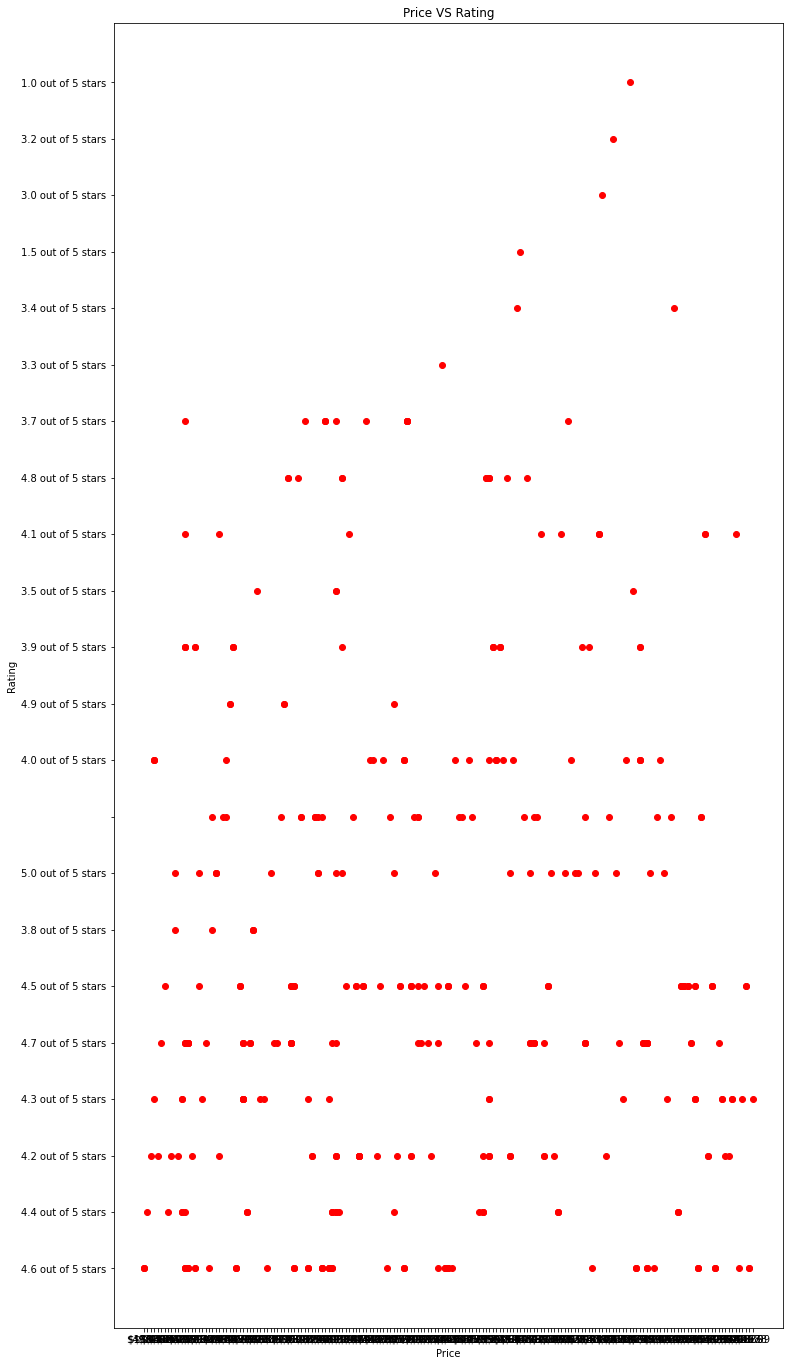

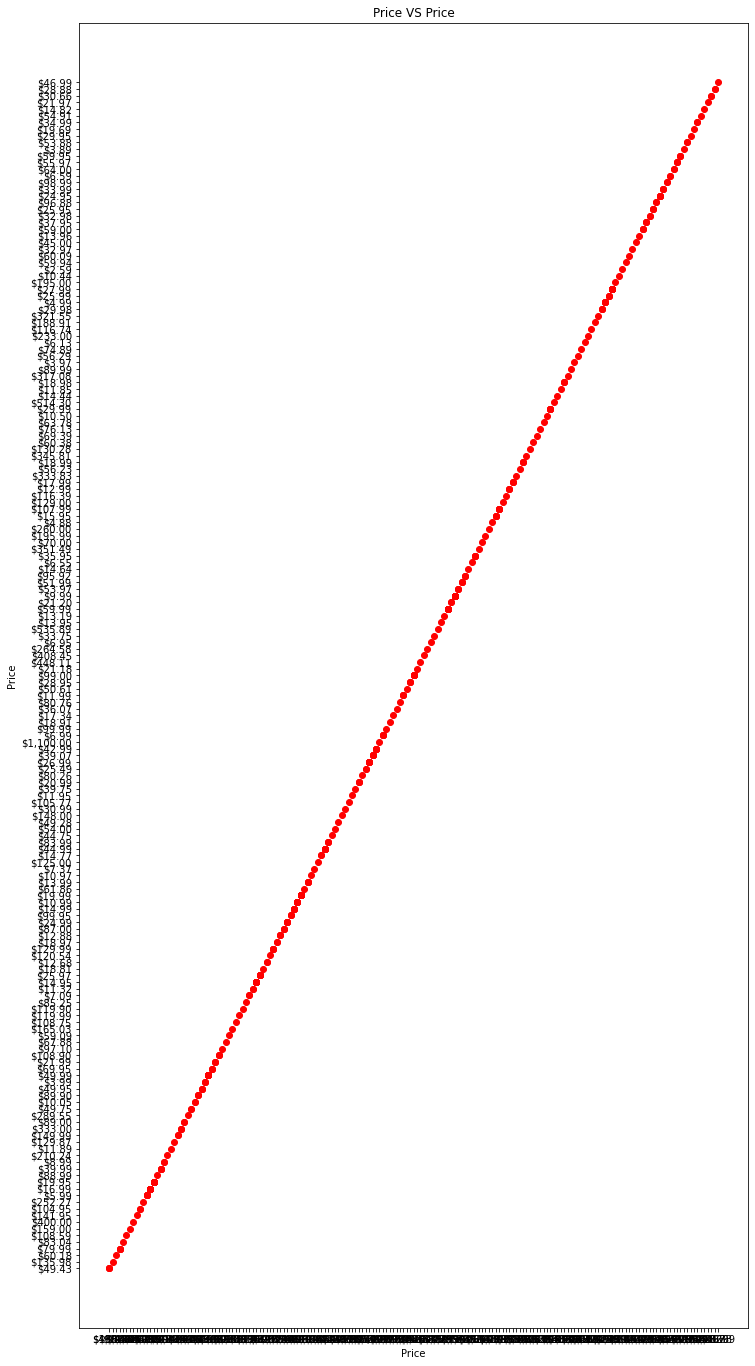

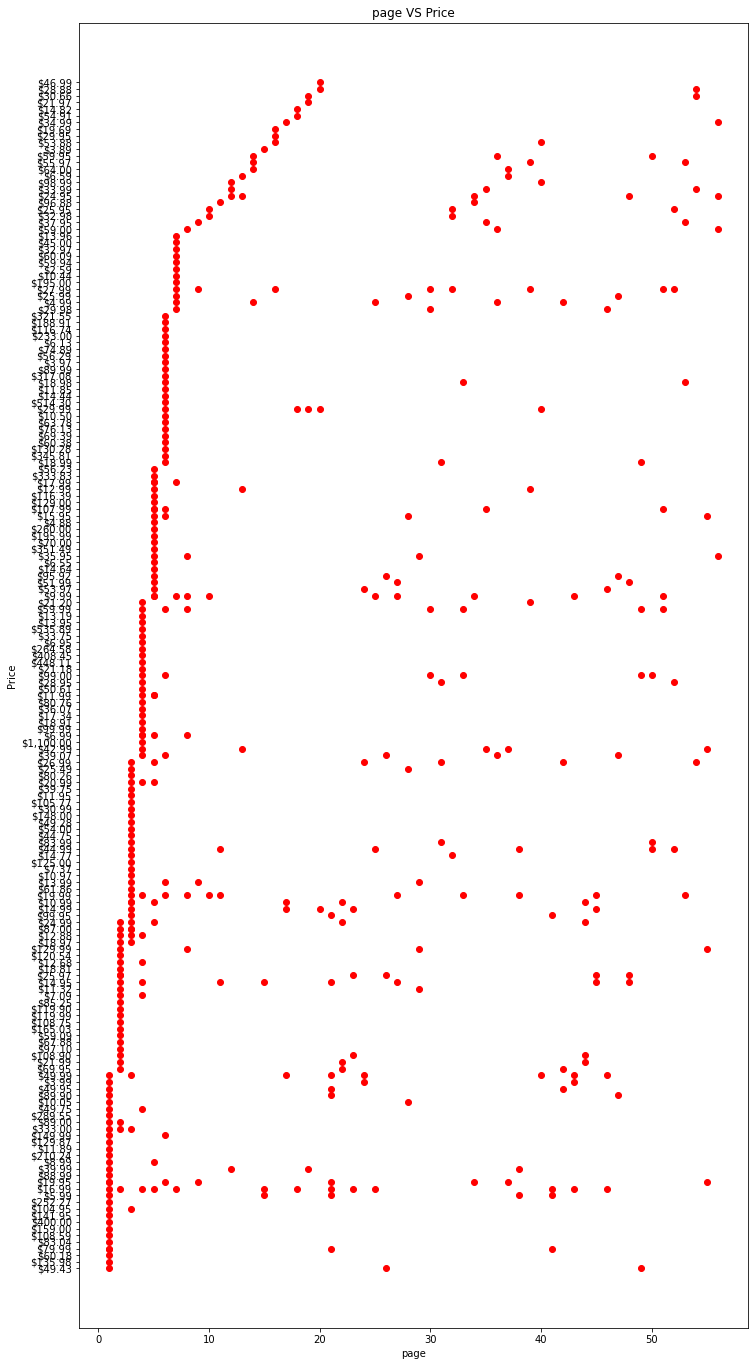

In [263]:
field1 = widgets.Dropdown(
    options=df.columns,
    value=df.columns[1],
    description='Select X',
    disabled=False,
)
field2= widgets.Dropdown(
    options=df.columns,
    value=df.columns[5],
    description='Select Y',
    disabled=False,
)
display(field1, field2)
output1=widgets.Output()
output1
def on_value_change(change):
    with output1:
        output1.clear_output()

        fig =plt.figure(figsize=(12, 24))
        plt.title(field1.label + " VS " + field2.label) 
        plt.xlabel(field1.label)
        plt.ylabel(field2.label)
        
        plt.plot(df[field1.value].values,df[field2.value].values, 
                'o', color='red')
#         plt.scatter(df[field1.value].values,df[field2.value].values,
#             c=df['Price'], cmap='viridis',
#             s=df['page'], linewidth=0, alpha=0.5)
#         plt.axis(aspect='equal')
#         plt.xlabel(field1.value)
#         plt.ylabel(field2.value)
#         plt.colorbar(label='log$_{10}$(df[field2.value])')
#         plt.clim(3, 7)
#         plt.title(field1.value+" VS" + field2.value)
        
     

field1.observe(on_value_change, names= 'value')
field2.observe(on_value_change, names= 'value')

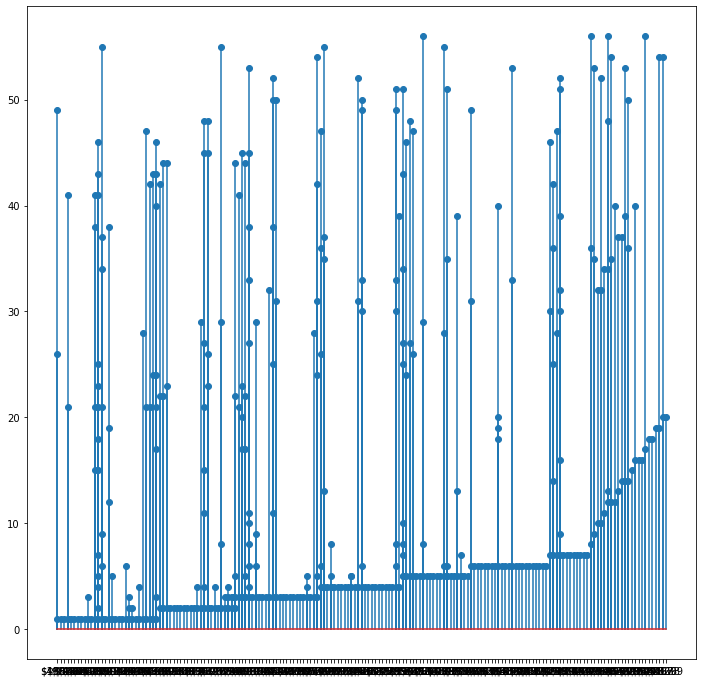

In [233]:
fig =plt.figure(figsize=(12, 12))
plt.stem(df['Price'], df['page'], use_line_collection = False)
plt.show()

In [274]:
df['Price']=df['Price'].astype(float)

ValueError: could not convert string to float: '$49.43'

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   408 non-null    object
 1   Price         408 non-null    object
 2   Rating        408 non-null    object
 3   Review Count  408 non-null    object
 4   URL           408 non-null    object
 5   page          408 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 19.2+ KB


In [249]:
for name, data in df.groupby('page'):
    plt.plot(data['Price'], data['Rating'], label=name)
    plt.xlabel('Price')
    plt.ylabel('Rating')
    plt.legend()
    #plt.savefig('plot_{}.png'.format(name))
    plt.close()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
for i in df['page']:
    plt.scatter(df['Price'].values, df['Rating'].values)